In [3]:
import pandas as pd

df = pd.read_csv('finance_data.csv', encoding='utf-8')
df

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
4842,neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
4844,negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [4]:
print(len(df))

df.head()

4846


,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


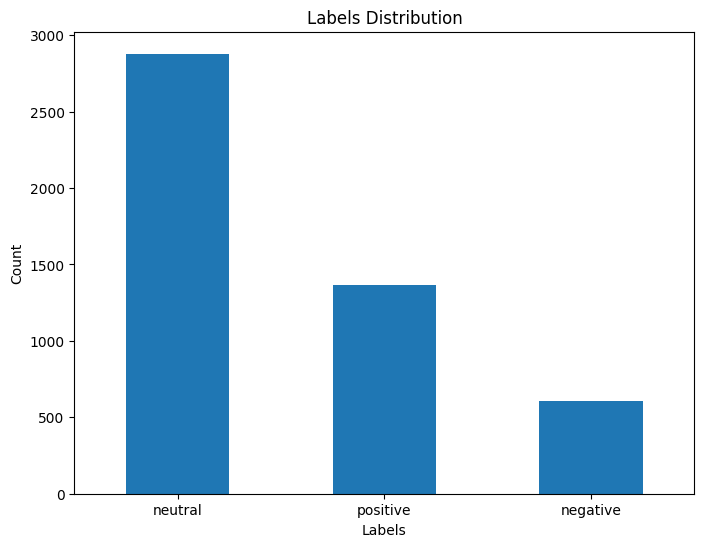

In [31]:
import matplotlib.pyplot as plt

# 각 레이블 별 개수 계산
label_counts = df['labels'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

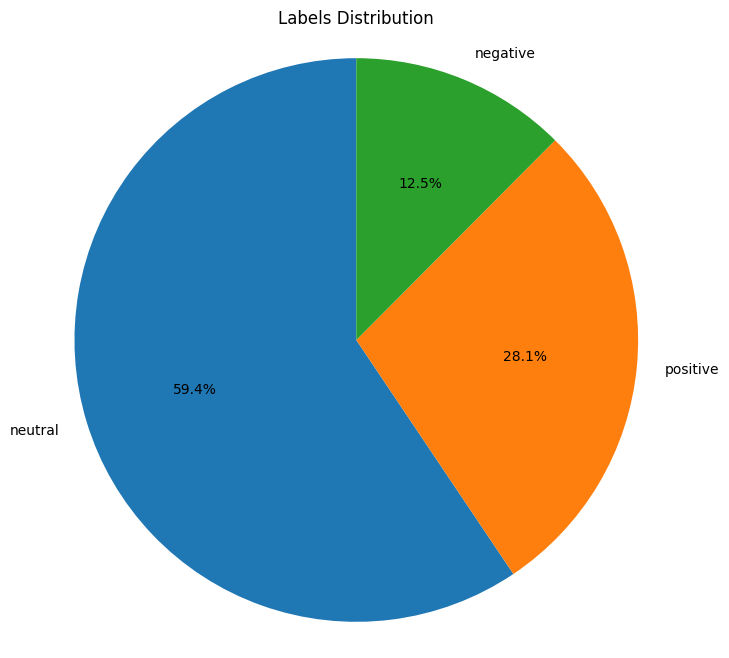

In [32]:
# 원형 그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Labels Distribution')
plt.axis('equal')  # 원형 비율 유지
plt.show()

In [33]:
def getLength(string):
    if str(type(string)) == "<class 'str'>":
        return len(string)
    else:
        return 0

In [34]:
text_Length = df['sentence'].apply(lambda x : getLength(x))
print(text_Length)

0       124
1       188
2       226
3       205
4       200
       ... 
4841    143
4842    144
4843    106
4844    224
4845     93
Name: sentence, Length: 4846, dtype: int64


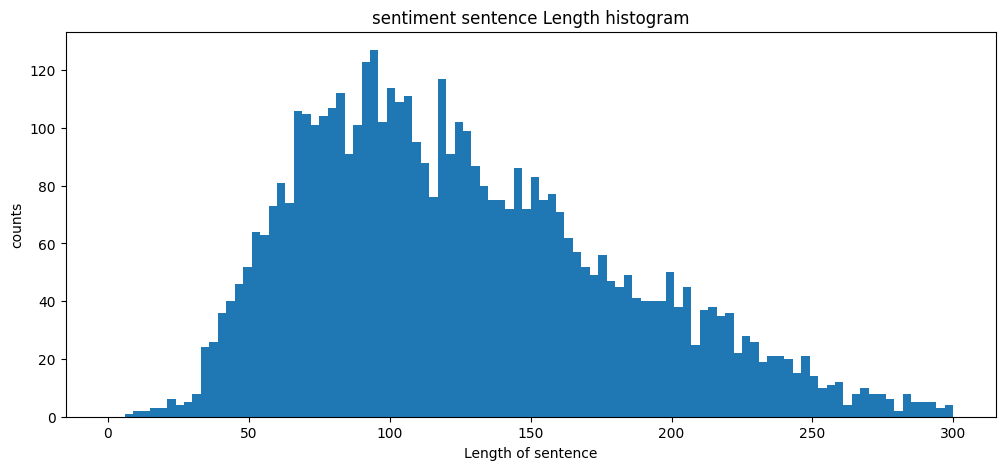

In [35]:
plt.figure(figsize=(12, 5))

plt.title('sentiment sentence Length histogram')
plt.ylabel('counts')
plt.xlabel('Length of sentence')

hist = plt.hist(text_Length, bins=100, range=[0, 300])

데이터 전처리

In [36]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stops = set(stopwords.words('english'))

In [38]:
def textPreprocessing(text):
    text = text.lower()
    text=re.sub('[^a-zA-Z]', ' ', text)
    word_List = text.split()

    # 유효 단어 추출
    valid_Words = []
    for word in word_List:
        if len(word) > 1:
            if word not in stops:
                valid_Words.append(word)
    return ' '.join(valid_Words)

WordCloud 만들기

In [39]:
pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from wordcloud import WordCloud